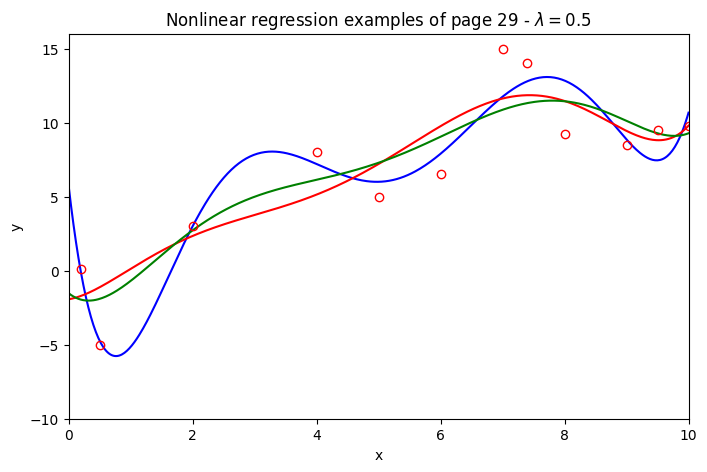

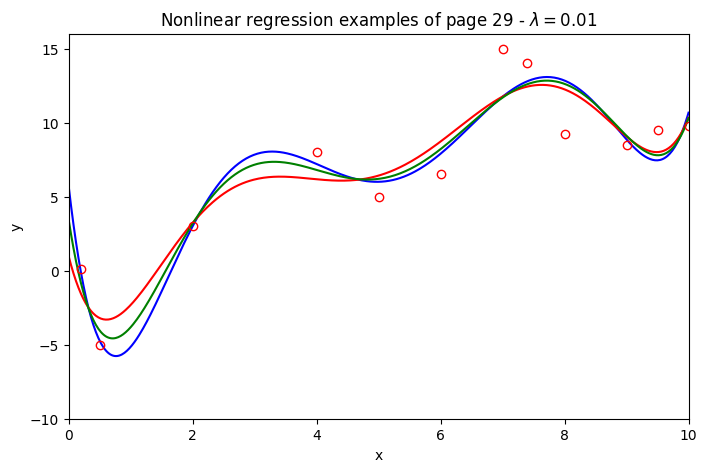

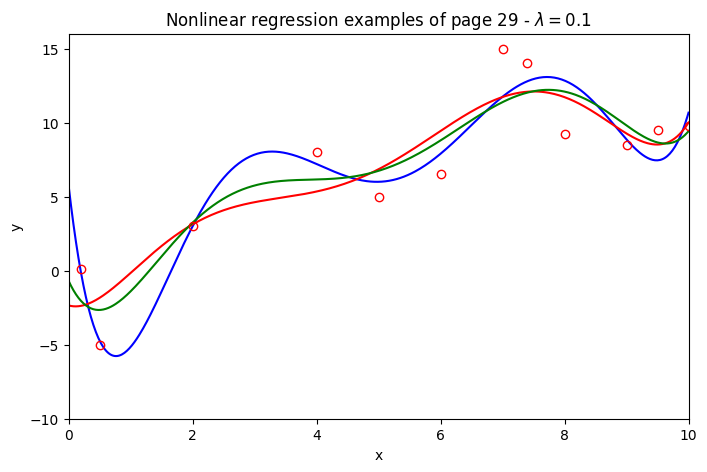

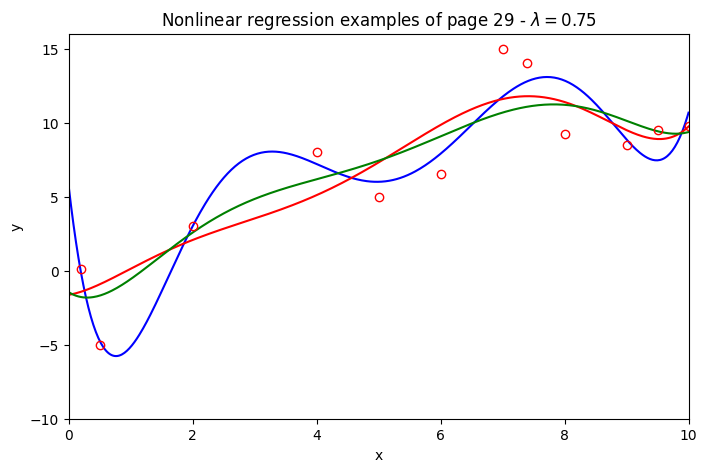

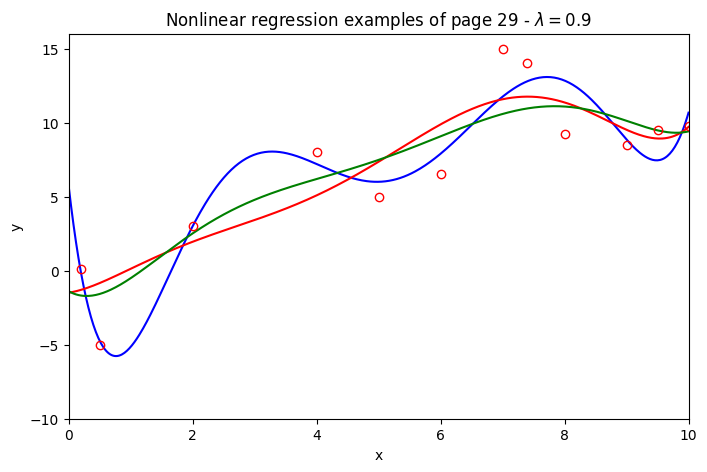

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.array([0.2, 0.5, 2, 4, 5, 6, 7, 7.4, 8, 9, 9.5, 10])
y_data = np.array([0.1, -5, 3, 8, 5, 6.5, 15, 14, 9.2, 8.5,9.5, 9.8])
degree = 6

B = np.vstack([x_data**k for k in range(degree + 1)]).T
x_fit = np.linspace(0, 10, 500)
B_fit = np.vstack([x_fit**k for k in range(degree + 1)]).T

def regular_least_squares():
    B_pseudoinverse = np.linalg.inv(B.T @ B) @ B.T
    w_regular_least_squares = B_pseudoinverse @ y_data
    return  B_fit @ w_regular_least_squares

def weight_decay_regularization(lambda_):
    w_decay_regularization = np.linalg.inv(B.T @ B + lambda_ * np.eye(degree + 1)) @ B.T @ y_data
    return B_fit @ w_decay_regularization

def first_derivative_regularization(lambda_):
    B1 = np.vstack([k * x_data**(k - 1) if k > 0 else np.zeros_like(x_data) for k in range(degree + 1)]).T
    w_first_derivative_regularization = np.linalg.inv(B.T @ B + lambda_ * B1.T @ B1) @ B.T @ y_data
    return B_fit @ w_first_derivative_regularization
    
def example_of_page_29(lambda_):   
    y_fit_regular_least_squares = regular_least_squares()
    y_fit_weight_decay_regularization = weight_decay_regularization(lambda_)
    y_fit_first_derivative_regularization = first_derivative_regularization(lambda_)
    
    plt.figure(figsize=(8, 5))
    plt.plot(x_fit, y_fit_regular_least_squares, 'b-')
    plt.plot(x_fit, y_fit_weight_decay_regularization, 'r-')
    plt.plot(x_fit, y_fit_first_derivative_regularization, 'g-',)
    plt.plot(x_data, y_data, 'o', mfc='none', color='r', label='Data')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(r'Nonlinear regression examples of page 29 - $\lambda=' + str(lambda_) + '$')
    plt.xlim(0, 10)
    plt.ylim(-10, 16)
    plt.show()

example_of_page_29(0.5)   
example_of_page_29(0.01) 
example_of_page_29(0.1)
example_of_page_29(0.75) 
example_of_page_29(0.9)   